In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read the shapefile for Malta
# Data obtained from Planning Authority
# https://msdi.data.gov.mt/geonetwork/srv/api/records/4c949ce6-70aa-4b18-b806-2e5a1a9544f9

malta = gpd.read_file('../data/shapes/AdministrativeUnit-polygon.shp')
malta.head()

,gml_id,nationalCo,localId,namespace,versionId,nationalLe,Country,language,nativeness,nameStatus,sourceOfNa,pronunciat,text,script,residenceO,beginLifes,geometry
0,NC.MT01402,MT01402,MT01402,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,MDINA,None,None,None,"POLYGON ((447040.654 3971185.551, 446999.716 3..."
1,NC.MT01310,MT01310,MT01310,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,ZEJTUN,None,None,None,"POLYGON ((457267.669 3969584.369, 457292.464 3..."
2,NC.MT01407,MT01407,MT01407,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,ZEBBUG (Malta),None,None,None,"POLYGON ((451771.848 3968960.369, 451768.332 3..."
3,NC.MT01206,MT01206,MT01206,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,QORMI,None,None,None,"POLYGON ((453115.422 3970282.927, 453097.354 3..."
4,NC.MT02611,MT02611,MT02611,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,RABAT (Victoria),None,None,None,"POLYGON ((430296.854 3989819.123, 430305.651 3..."


In [11]:
prices_data = pd.read_csv('../data/statistics/prices.csv')
malta = malta.merge(prices_data, left_on='text', right_on='City')
malta.head()

,gml_id,nationalCo,localId,namespace,versionId,nationalLe,Country,language,nativeness,nameStatus,sourceOfNa,pronunciat,text,script,residenceO,beginLifes,geometry,City,Price
0,NC.MT01402,MT01402,MT01402,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,MDINA,None,None,None,"POLYGON ((447040.654 3971185.551, 446999.716 3...",MDINA,1
1,NC.MT01310,MT01310,MT01310,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,ZEJTUN,None,None,None,"POLYGON ((457267.669 3969584.369, 457292.464 3...",ZEJTUN,2
2,NC.MT01407,MT01407,MT01407,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,ZEBBUG (Malta),None,None,None,"POLYGON ((451771.848 3968960.369, 451768.332 3...",ZEBBUG (Malta),3
3,NC.MT01206,MT01206,MT01206,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,QORMI,None,None,None,"POLYGON ((453115.422 3970282.927, 453097.354 3...",QORMI,4
4,NC.MT02611,MT02611,MT02611,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,RABAT (Victoria),None,None,None,"POLYGON ((430296.854 3989819.123, 430305.651 3...",RABAT (Victoria),5


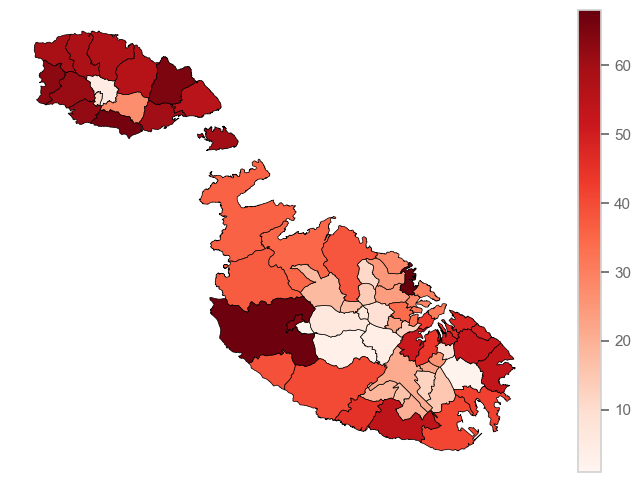

In [12]:
# Set style and plot cities polygons in Malta
sns.set(
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":18,
                                "axes.labelsize":18})



# Plot the shapefile
fig, ax = plt.subplots(figsize=(10, 6))
malta.plot(column='Price', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0', legend=True)

# plt.legend(frameon=False)
plt.axis('off')

# Display the plot
plt.show()


In [14]:
malta.explore(column="Price",
    tooltip="Price",
    popup=True,
    tiles="CartoDB positron",  # use "CartoDB positron" tiles
    cmap="Reds",)

In [9]:
malta.to_csv("cities.csv", sep=",", columns=['text'])

In [ ]:
# Upcoming statistics

# average price by city, check distribution
# average rent by city check distribution
# gross yield by city check distribution
# vacancy count per city check distribution
# vacancy relative to city population
# rental price analysis relation to city and country as a whole